## Machine Learning Foundations
# Unsupervised Machine Lerning - Clustering
Sumudu Tennakoon, PhD

<hr>

To learn more about Python, refeer to the following websites

* Python : www.python.org

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm # color map
import seaborn as sns

# Generating a Dataset for Clustering Porblem
## Telecom Problem

### Generate Columns as Numpy Arrays

In [2]:
# Customer ID column
customers = np.arange(0,1000) + 1

# Display first 10 elements
customers[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [3]:
# Customer SMS usage column: combining two normal distributions
sms = np.concatenate((np.random.normal(200, 100, 700), np.random.normal(600, 100, 300)))

# Customer Call Minutes usage column: combining two normaldistributions
minutes = np.concatenate((np.random.normal(500, 100, 700), np.random.normal(800, 100, 300)))

# Customer Data usage column: combining two normal distributions
data = np.abs(np.concatenate((np.random.normal(20, 50, 700), np.random.normal(30, 15, 300))))

### Constructing DataFrame

In [4]:
usage_data = pd.DataFrame(data={'customer_id':customers, 'sms':sms, 'minutes':minutes, 'data':data})
usage_data.head()

,customer_id,sms,minutes,data
0,1,329.873812,417.765482,15.711267
1,2,272.929456,602.154228,19.890979
2,3,134.617363,570.917246,94.294491
3,4,258.552479,495.269588,69.246713
4,5,194.675515,635.070091,1.566801


### plot 3D data in 2D using color intesity as 3rd axis

<AxesSubplot:xlabel='sms', ylabel='minutes'>

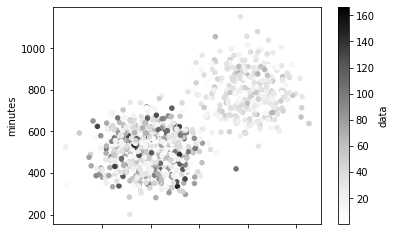

In [5]:
usage_data.plot(kind='scatter', x='sms', y='minutes', c='data' )

### Generate 3D Plot in Matplotlib

<ipython-input-6-8b3f4bc588bc>:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


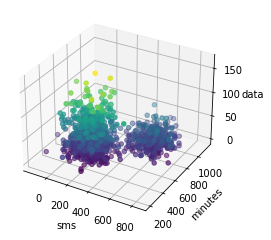

In [6]:
fig = plt.figure().gca(projection='3d')
fig.scatter(usage_data['sms'], usage_data['minutes'], usage_data['data'], c=usage_data['data'])
fig.set_xlabel('sms')
fig.set_ylabel('minutes')
fig.set_zlabel('data')
plt.show()

# KMeans Clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## Assemble Feature Dataset (X)


In [7]:
X = usage_data[['sms', 'minutes', 'data']]
X.head()

,sms,minutes,data
0,329.873812,417.765482,15.711267
1,272.929456,602.154228,19.890979
2,134.617363,570.917246,94.294491
3,258.552479,495.269588,69.246713
4,194.675515,635.070091,1.566801


## Model Training

In [8]:
from sklearn.cluster import KMeans

# Create Model
model = KMeans(n_clusters=3, random_state=42)

# Training
model.fit(X)

KMeans(n_clusters=3, random_state=42)

## Making Predictions (Assigning Cluster Numbers) 

In [9]:
y_pred = model.predict(X)

usage_data['cluster'] = y_pred
usage_data.head()

,customer_id,sms,minutes,data,cluster
0,1,329.873812,417.765482,15.711267,0
1,2,272.929456,602.154228,19.890979,0
2,3,134.617363,570.917246,94.294491,2
3,4,258.552479,495.269588,69.246713,0
4,5,194.675515,635.070091,1.566801,2


### Plot Results (Matplotlin 3D Plot)

<ipython-input-10-9c1385fb2576>:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


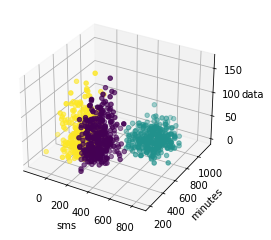

In [10]:
fig = plt.figure().gca(projection='3d')
fig.scatter(usage_data['sms'], usage_data['minutes'], usage_data['data'], c=usage_data['cluster'])
fig.set_xlabel('sms')
fig.set_ylabel('minutes')
fig.set_zlabel('data')
plt.show()

### Plot Results in 2D

<AxesSubplot:xlabel='sms', ylabel='minutes'>

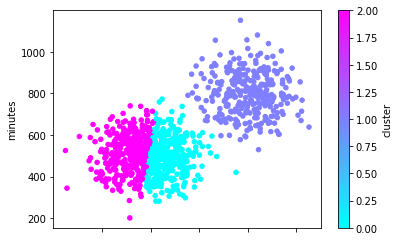

In [11]:
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
cmap = cm.get_cmap('cool') 

usage_data.plot(kind='scatter', x='sms', y='minutes', c='cluster', cmap=cmap )

<AxesSubplot:xlabel='sms', ylabel='data'>

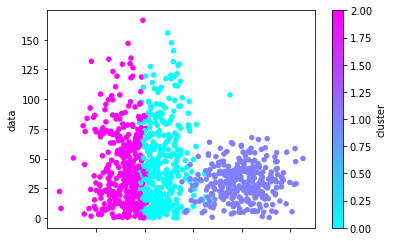

In [12]:
usage_data.plot(kind='scatter', x='sms', y='data', c='cluster', cmap=cmap )

<AxesSubplot:xlabel='minutes', ylabel='data'>

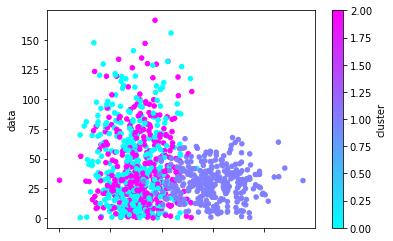

In [13]:
usage_data.plot(kind='scatter', x='minutes', y='data', c='cluster', cmap=cmap )

# Using Scikit-learn `make_blobs` Function to Generate Dataset

In [14]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

from sklearn.datasets import make_blobs

n_samples = 1000

X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=2, random_state=42)

# Assemble DataFrame with Feature Columns X
data = pd.DataFrame(data=X, columns=['x1', 'x2'])

# Assign generated cluster label.
data['generated_cluster'] = y

data.head()

,x1,x2,generated_cluster
0,-6.313051,-7.397920,2
1,-5.395436,-6.281524,2
2,5.756533,2.125180,1
3,-3.427919,7.314597,0
4,-3.028380,6.008000,0


### Plot result

<AxesSubplot:xlabel='x1', ylabel='x2'>

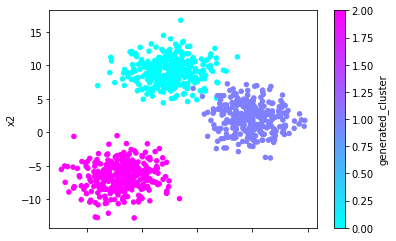

In [15]:
cmap = cm.get_cmap('cool') 
data.plot(kind='scatter', x='x1', y='x2', c='generated_cluster', cmap=cmap )

### Apply Descriptive Statistics

In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,1000.0,-1.526079,5.188898,-12.286092,-5.798285,-2.466269,3.526041,9.760048
x2,1000.0,1.487945,6.735978,-12.760887,-5.360448,2.293888,7.636341,16.719749
generated_cluster,1000.0,0.999000,0.817109,0.000000,0.000000,1.000000,2.000000,2.000000


## Train K-MEans Clustering Model

In [17]:
X = data[['x1', 'x2']]

model = KMeans(n_clusters=3, random_state=42)

model.fit(X)

y_pred = model.predict(X)

data['predicted_cluster'] = y_pred

data.head()

,x1,x2,generated_cluster,predicted_cluster
0,-6.313051,-7.397920,2,0
1,-5.395436,-6.281524,2,0
2,5.756533,2.125180,1,1
3,-3.427919,7.314597,0,2
4,-3.028380,6.008000,0,2


<AxesSubplot:xlabel='x1', ylabel='x2'>

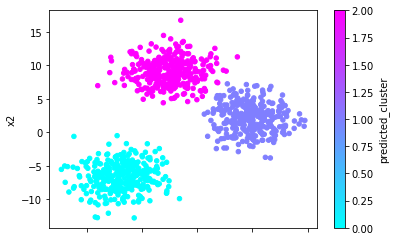

In [18]:
# Plot results
cmap = cm.get_cmap('cool') 
data.plot(kind='scatter', x='x1', y='x2', c='predicted_cluster', cmap=cmap )

# Revisit Telecom Problem

## Create Dataset using `make_blobs` Function

In [19]:
from sklearn.datasets import make_blobs

n_samples = 1000

X, y = make_blobs(n_samples=n_samples, n_features=3, centers=3, cluster_std=1.5, random_state=42)

usage_data = pd.DataFrame(data=np.abs(X), columns=['sms', 'minutes', 'data'])
usage_data['generated_group'] = y
usage_data.head()

,sms,minutes,data,generated_group
0,1.180102,8.808669,4.940080,0
1,1.582422,4.289376,6.735459,1
2,1.662146,8.062379,6.133507,0
3,9.068554,9.404409,3.742236,2
4,5.197265,8.344126,6.447263,0


In [20]:
usage_data.describe()

,sms,minutes,data,generated_group
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.537667,7.741996,4.573643,0.999000
std,3.434051,1.748576,2.390233,0.817109
min,0.001954,2.116378,0.006129,0.000000
25%,1.769317,6.525186,2.715893,0.000000
50%,3.139080,7.748520,4.550802,1.000000
75%,7.881703,8.893062,6.460729,2.000000
max,12.425239,13.189952,10.484240,2.000000


### Scale Columns to Match Realistic Numbers

In [21]:
usage_data['sms'] = usage_data['sms'] *20
usage_data['minutes'] = usage_data['minutes'] *50
usage_data['data'] = usage_data['data']*5
usage_data.describe()

,sms,minutes,data,generated_group
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,90.753342,387.099783,22.868215,0.999000
std,68.681019,87.428783,11.951166,0.817109
min,0.039072,105.818904,0.030643,0.000000
25%,35.386340,326.259309,13.579466,0.000000
50%,62.781604,387.426019,22.754010,1.000000
75%,157.634058,444.653090,32.303647,2.000000
max,248.504788,659.497613,52.421202,2.000000


In [22]:
usage_data['sms'] = usage_data['sms'].round(0)
usage_data['minutes'] = usage_data['minutes'].round(0)
usage_data['data'] = usage_data['data'].round(1)
usage_data.describe()

,sms,minutes,data,generated_group
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,90.745000,387.088000,22.868500,0.999000
std,68.678517,87.418638,11.950979,0.817109
min,0.000000,106.000000,0.000000,0.000000
25%,35.000000,326.000000,13.575000,0.000000
50%,63.000000,387.000000,22.750000,1.000000
75%,158.000000,445.000000,32.300000,2.000000
max,249.000000,659.000000,52.400000,2.000000


<ipython-input-23-973d0a9423d2>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


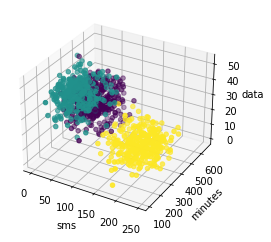

,sms,minutes,data,generated_group
0,24.0,440.0,24.7,0
1,32.0,214.0,33.7,1
2,33.0,403.0,30.7,0
3,181.0,470.0,18.7,2
4,104.0,417.0,32.2,0


In [23]:
# Plot results
fig = plt.figure().gca(projection='3d')
fig.scatter(usage_data['sms'], usage_data['minutes'], usage_data['data'], c=usage_data['generated_group'])
fig.set_xlabel('sms')
fig.set_ylabel('minutes')
fig.set_zlabel('data')
plt.show()

usage_data.head()

<AxesSubplot:xlabel='sms', ylabel='minutes'>

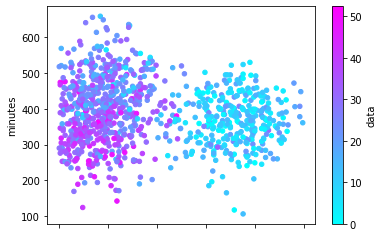

In [24]:
usage_data.plot(kind='scatter', x='sms', y='minutes', c='data', cmap=cmap )

## Apply K-Means Clustering

<ipython-input-25-d3f4fcc0bbed>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


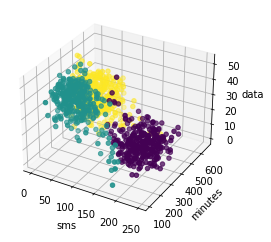

In [25]:
X = usage_data[['sms', 'minutes', 'data']]

model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

y_pred = model.predict(X)
usage_data['predicted_cluster_km'] = y_pred

fig = plt.figure().gca(projection='3d')
fig.scatter(usage_data['sms'], usage_data['minutes'], usage_data['data'], c=usage_data['predicted_cluster_km'])
fig.set_xlabel('sms')
fig.set_ylabel('minutes')
fig.set_zlabel('data')
plt.show()

# Hierarchical Clustering

In [26]:
X = usage_data[['sms', 'minutes', 'data']]
X.head()

,sms,minutes,data
0,24.0,440.0,24.7
1,32.0,214.0,33.7
2,33.0,403.0,30.7
3,181.0,470.0,18.7
4,104.0,417.0,32.2


In [27]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
model.fit(X)

AgglomerativeClustering(n_clusters=3)

<ipython-input-28-a7c85b1764aa>:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


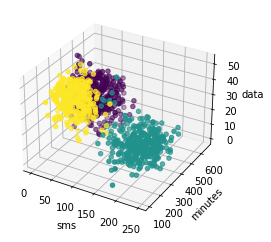

In [28]:
usage_data['predicted_cluster_hc'] = model.labels_ 

fig = plt.figure().gca(projection='3d')
fig.scatter(usage_data['sms'], usage_data['minutes'], usage_data['data'], c=usage_data['predicted_cluster_hc'])
fig.set_xlabel('sms')
fig.set_ylabel('minutes')
fig.set_zlabel('data')
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

* Good for data which contains clusters of similar density.
* No need to specify number of clusters when training.
* Can apply on arbitrary shapeed clusters.
* Able to detect the outliers.



,x1,x2,generated_cluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,0


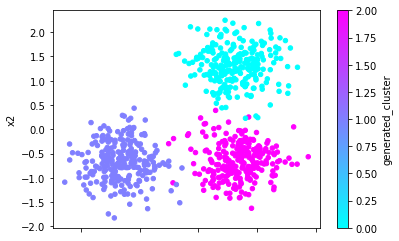

In [29]:
from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
                          
X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

data = pd.DataFrame(data=X, columns=['x1', 'x2'])
data['generated_cluster'] = y

data.plot(kind='scatter', x='x1', y='x2', c='generated_cluster', cmap=cmap )

data.head()

In [30]:
# Feature Datset to model (X)
X = data[['x1', 'x2']]
X.head()

,x1,x2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


## Train Model

In [31]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=10)
model.fit(X)

DBSCAN(eps=0.3, min_samples=10)

## Predict

,x1,x2,generated_cluster,predicted_cluster
0,0.494261,1.451067,0,0
1,-1.428081,-0.837064,1,1
2,0.338559,1.038759,0,0
3,0.119001,-1.053976,2,2
4,1.122425,1.774937,0,0


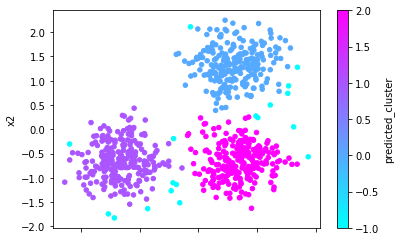

In [32]:
data['predicted_cluster'] = model.labels_ 
data.plot(kind='scatter', x='x1', y='x2', c='predicted_cluster', cmap=cmap )
data.head()

## DBSCAN on Telecom Problem

In [33]:
X = usage_data[['sms', 'minutes', 'data']]
X.head()

,sms,minutes,data
0,24.0,440.0,24.7
1,32.0,214.0,33.7
2,33.0,403.0,30.7
3,181.0,470.0,18.7
4,104.0,417.0,32.2


In [34]:
model = DBSCAN(eps=20, min_samples=10)
model.fit(X)

DBSCAN(eps=20, min_samples=10)

<ipython-input-35-f2551f3bfdb1>:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


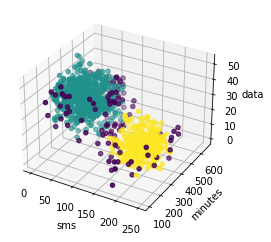

In [35]:
usage_data['predicted_cluster_db'] = model.labels_ 

fig = plt.figure().gca(projection='3d')
fig.scatter(usage_data['sms'], usage_data['minutes'], usage_data['data'], c=usage_data['predicted_cluster_db'])
fig.set_xlabel('sms')
fig.set_ylabel('minutes')
fig.set_zlabel('data')
plt.show()


<hr>
Last update 2022-03-19 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.